In [1]:
import numpy as np
import cv2
import myUtil as utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from scipy import misc

In [2]:
zeros=[]
ones=[]
eight=cv2.resize(utils.readRaw("HW4_Images/eight.raw",28,28).astype('uint8'),(56,56))
for i in range(5):
    zeros.append(cv2.resize(utils.readRaw("HW4_Images/zero_"+str(i+1)+".raw",28,28).astype('uint8'),(56,56)))
    ones.append(cv2.resize(utils.readRaw("HW4_Images/one_"+str(i+1)+".raw",28,28).astype('uint8'),(56,56)))


(15, 128) 15


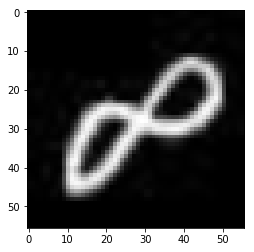

In [3]:
sift=cv2.xfeatures2d.SIFT_create()
kps_eight,des_eight=sift.detectAndCompute(eight,None)
img=cv2.drawKeypoints(eight,kps_eight,None)
plt.imshow(eight,cmap='gray')
print(des_eight.shape,len(kps_eight))

In [4]:
des_set=np.zeros((0,128))
des_0=np.zeros((0,128))
des_1=np.zeros((0,128))
for i in range(5):
    kps,des=sift.detectAndCompute(zeros[i],None)
    des_set=np.concatenate((des_set,des),axis=0)
    des_0=np.concatenate((des_0,des),axis=0)
    
    kps,des=sift.detectAndCompute(ones[i],None)
    des_set=np.concatenate((des_set,des),axis=0)
    des_1=np.concatenate((des_1,des),axis=0)
print(des_set.shape,des_0.shape,des_1.shape)

(119, 128) (54, 128) (65, 128)


In [8]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(des_set)
pre_0=kmeans.predict(des_0)
pre_1=kmeans.predict(des_1)
bins_0=np.bincount(pre_0)
bins_1=np.bincount(pre_1)
bins_0=bins_0/np.sum(bins_0)
bins_1=bins_1/np.sum(bins_1)
print(bins_0)
print(bins_1)


[0.37037037 0.62962963]
[0.52307692 0.47692308]


In [9]:
pre_8=kmeans.predict(des_eight)
bins_8=np.bincount(pre_8)
bins_8=bins_8/np.sum(bins_8)
print(bins_8)

[0.26666667 0.73333333]


(<Figure size 432x288 with 1 Axes>, <BarContainer object of 2 artists>)

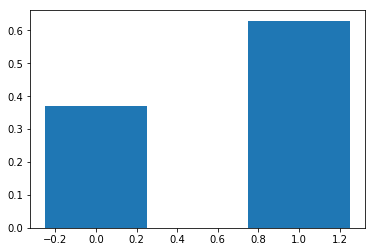

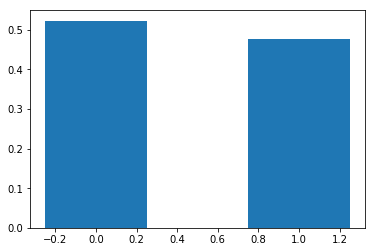

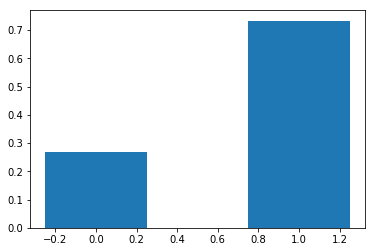

In [10]:
plt.figure(),plt.bar(x=[0,1],height=bins_0,width=0.5)
plt.figure(),plt.bar(x=[0,1],height=bins_1,width=0.5)
plt.figure(),plt.bar(x=[0,1],height=bins_8,width=0.5)

In [11]:
def matching(bin_test,bin_train):
    d=len(bin_train)
    s=0
    for i in range(d):
        r=min(bin_test[i],bin_train[i])/max(bin_test[i],bin_train[i])
        s+=r
    return s

In [12]:
match_8_0=matching(bins_8,bins_0)
match_8_1=matching(bins_8,bins_1)
print(match_8_0,match_8_1)

1.5785858585858588 1.1601535719182778
